# Project 3 : Multi-Agent Tennis

## Load the environment

Load the Unity environment. Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

# Load unity environment
env = UnityEnvironment(file_name="./Tennis_Linux_NoVis/Tennis.x86_64")

# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## Start the Environment

In [2]:
# Reset the environment    
env_info = env.reset(train_mode=True)[brain_name]     

# number of agents
num_agents = len(env_info.agents)

# size of each action
action_sz = brain.vector_action_space_size

# size of the state space 
states = env_info.vector_observations  
state_sz = states.shape[1]


### Train the set of agents using the Multi-Agent DDPG

In [3]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from multi_agent import MultiAgent


max_episodes = 10000                
maxm_steps = 1000                    


def train():
 mul_agent = MultiAgent(state_sz, action_sz, num_agents)
 score_list = []
 for ep_num in range(1,max_episodes+1):
  current_val = np.zeros(num_agents)  
  environment_info = env.reset(train_mode=True)[brain_name]
  current_states = environment_info.vector_observations
  for steps in range(1,maxm_steps+1):
   actions = mul_agent.act(current_states)             
   environment_info = env.step(actions)[brain_name]
   next_states = environment_info.vector_observations
   done = environment_info.local_done
   rewards = environment_info.rewards
   current_val += rewards
   mul_agent.step(current_states, actions, rewards, next_states, done)
   current_states = next_states
   if np.any(environment_info.local_done,axis=0):
    break

  score_list.append(np.max(current_val))    
  if ep_num % 100 == 0:
   mul_agent.save()     
   print('Episode {} Average Score: {:.2f} '.format(ep_num, np.mean(score_list[-100:])))
  if np.mean(score_list[-100:]) >=0.5:
   mul_agent.save()
   print('Task completed in {} episodes - Concluded with Average Score  {:.2f}'.format(ep_num, np.mean(score_list[-100:])))
   break
    
 plt.plot(np.arange(1, len(score_list)+1), score_list)
 plt.xlabel('number of episodes')
 plt.ylabel('score value')
 plt.show()
 
 



Episode 100 Average Score: 0.00 
Episode 200 Average Score: 0.00 
Episode 300 Average Score: 0.01 
Episode 400 Average Score: 0.00 
Episode 500 Average Score: 0.00 
Episode 600 Average Score: 0.01 
Episode 700 Average Score: 0.01 
Episode 800 Average Score: 0.01 
Episode 900 Average Score: 0.01 
Episode 1000 Average Score: 0.01 
Episode 1100 Average Score: 0.01 
Episode 1200 Average Score: 0.02 
Episode 1300 Average Score: 0.04 
Episode 1400 Average Score: 0.05 
Episode 1500 Average Score: 0.04 
Episode 1600 Average Score: 0.04 
Episode 1700 Average Score: 0.04 
Episode 1800 Average Score: 0.03 
Episode 1900 Average Score: 0.03 
Episode 2000 Average Score: 0.04 
Episode 2100 Average Score: 0.06 
Episode 2200 Average Score: 0.08 
Episode 2300 Average Score: 0.08 
Episode 2400 Average Score: 0.08 
Episode 2500 Average Score: 0.09 
Episode 2600 Average Score: 0.16 
Episode 2700 Average Score: 0.15 
Task completed in 2796 episodes - Concluded with Average Score  0.50


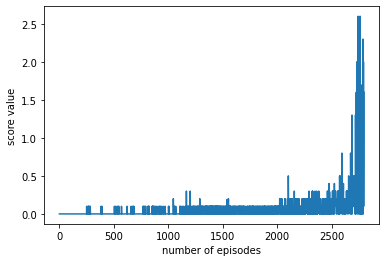

In [4]:

scores = train()


In [10]:
env.close()